In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Life Expectancy Data.csv")
df = df.drop(columns = ['Status','Country']) #так как там строки
df = df.dropna()
df
     

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


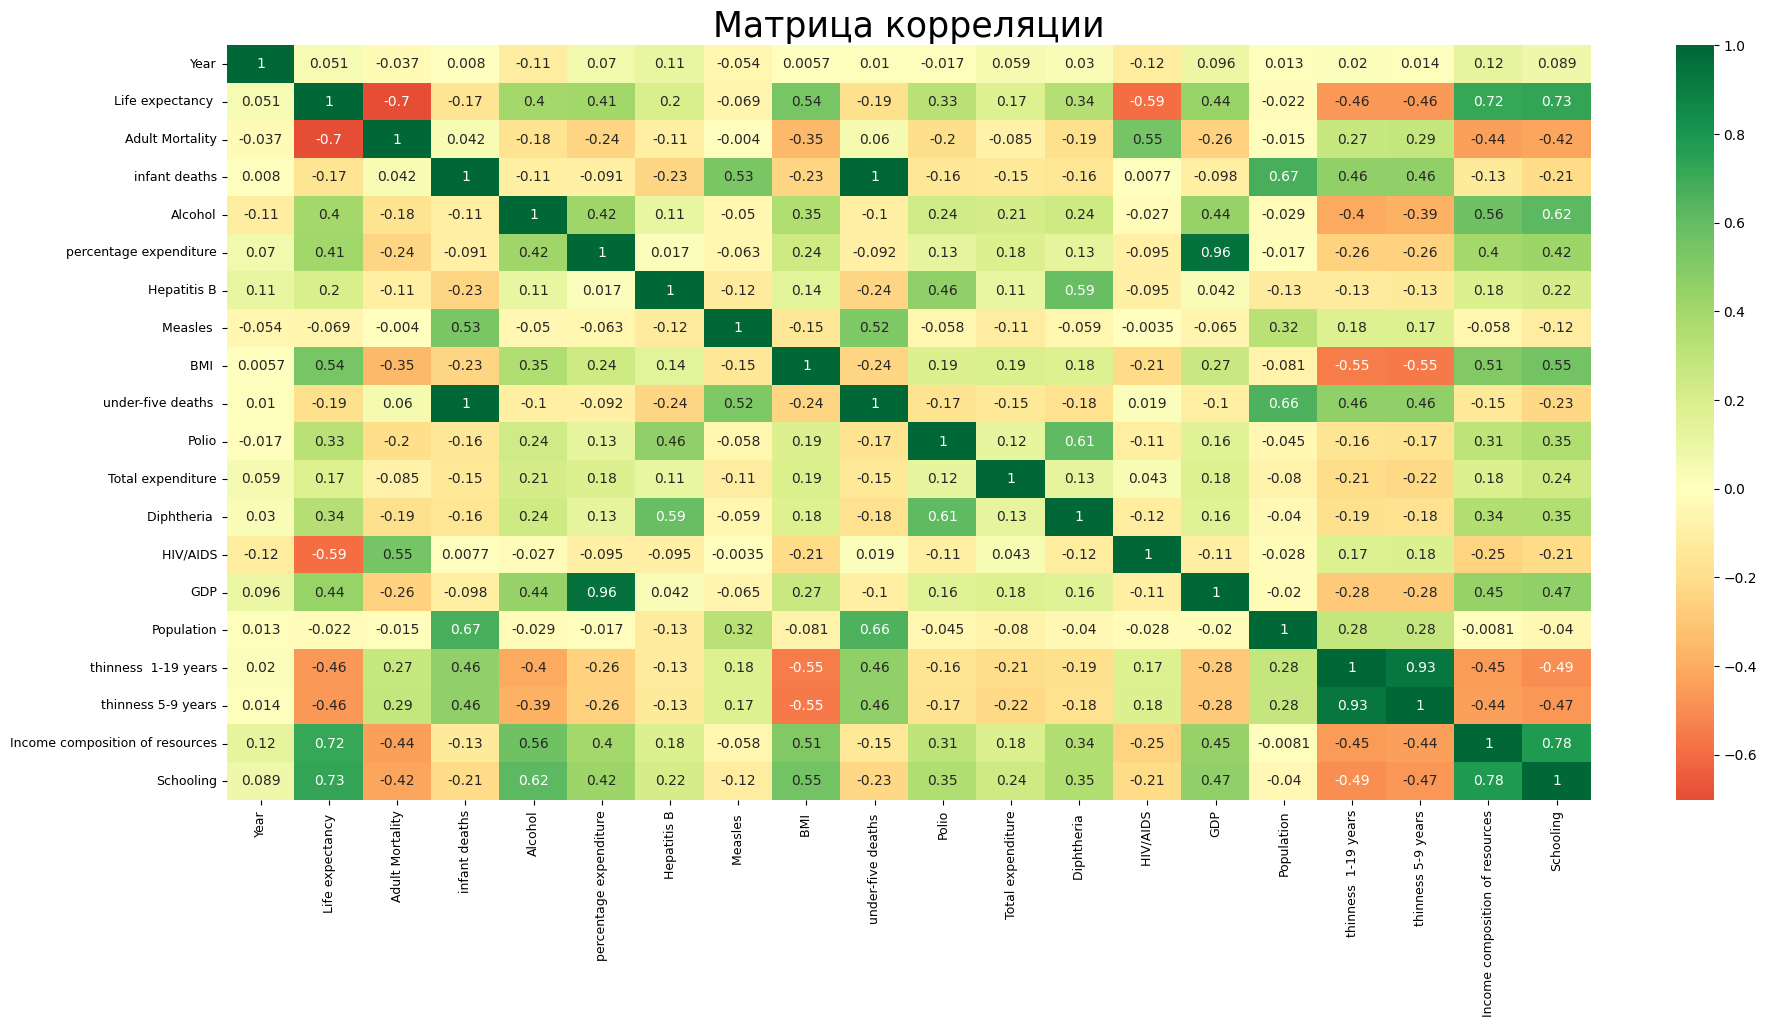

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
df.corr()
plt.figure(figsize=(22,10), dpi= 100)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Матрица корреляции', fontsize=25)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

In [23]:
#Выбираем Schooling из-за сильной корреляции с Life expectancy (нашим target)

In [24]:
import numpy as np
df_new = df.drop(columns = ['Life expectancy '])
columns_name = df_new.columns.tolist()
t = df_new['Schooling']
X = np.array(t).reshape(-1, 1)
X


array([[10.1],
       [10. ],
       [ 9.9],
       ...,
       [10. ],
       [ 9.8],
       [ 9.8]])

In [25]:
columns_name = 'Schooling'

In [26]:
y = df['Life expectancy ']
y=np.array(y).reshape(-1, 1)
y


array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (1154, 1), (1154, 1)
Test dataset size: (495, 1), (495, 1)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [29]:
w0 = model.intercept_
w0

array([40.44801731])

In [30]:
w1 = model.coef_
w1

array([[2.38372723]])

In [31]:
print("y =" ,  w0 ,"+", w1 ,"Schooling")

y = [40.44801731] + [[2.38372723]] Schooling


In [32]:
# уравнение: y = 40.44801731 + 2.38372723 Schooling

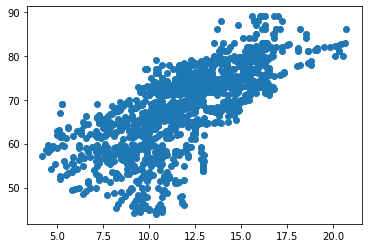

In [33]:
y_pred = model.predict(X_test)
     

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X, y)

plt.show()
     

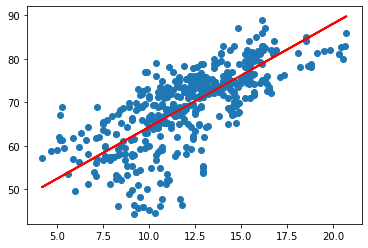

In [34]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2);
plt.show()

In [35]:
l = (y_test - y_pred)**2
MSE_vruch = sum(l)/len(l)
MSE_vruch

array([39.3026436])

In [36]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
     

Mean Absolute Error: 4.7472130951801566
Mean Squared Error: 39.30264359978076
R2 score: 0.49208337584314976


In [37]:
#Вывод: разработанная модель работает лучше простого усреднения, однако не силь хорошо(так как R2=0.5 , a не 1; также MSE=39 , a не близко к 0)